In [24]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np



In [25]:
print(plt.style.available)
mpl.style.use('ggplot') 

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [26]:
def create_waffle_chart(categories,values,height,width,colormap,value_sign=''):
    
    total_values=sum(values)
    category_proportions=[float(value)/total_values for value in values]
    
    total_num_tiles=height*width
    print('Total num tiles is ',total_num_tiles)
    
    tile_per_category=[  round(proportion*total_num_tiles) for proportion in category_proportions]
    
    for i,tiles in enumerate(tile_per_category):
        print(categories[i]+':'+str(tiles))
    
    waffle_chart=np.zeros((height,width))
    category_index=0
    tile_index=0
    for col in range(width):
        for row in range(height):
            tile_index+=1
            if tile_index>sum(tile_per_category[0:category_index]):
                category_index+=1
            waffle_chart[row,col]=category_index
    fig=plt.figure()
    
    #colormap=plt.cm.coolwarm
    plt.matshow(waffle_chart,cmap=colormap)
    plt.colorbar()
    
    ax=plt.gca()
    ax.set_xticks(np.arange(-.5,width,1),minor=True)
    ax.set_yticks(np.arange(-.5,height,1),minor=True)
    ax.grid(which='minor',color='w',linestyle='-',linewidth=2)
    
    plt.xticks([])
    plt.yticks([])
    
    values_cumsum=np.cumsum(values)
    total_values=values_cumsum[len(values_cumsum)-1]
    
    legend_handles=[]
    for i,category in enumerate(categories):
        if  value_sign=='%':
            label_str =  category+'('+str(values(i))+value_sign+')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
        color_val=colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val,label=label_str))                             
    
    
    plt.legend(
               handles=legend_handles,
               loc='lower center',
               ncol=len(categories),
               bbox_to_anchor=(0.,-0.2,0.95,.1)
              )
    
      

Total num tiles is  400
a:69
b:126
c:206


<Figure size 640x480 with 0 Axes>

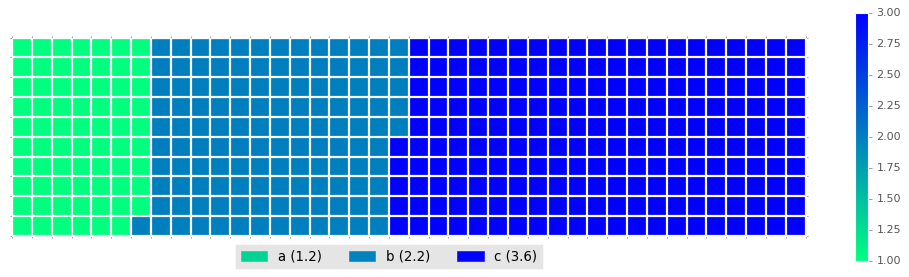

In [31]:
mpl.style.use('ggplot') 
width = 40 # width of chart
height = 10 # height of chart

categories =['a','b','c'] 
values = [1.2,2.2,3.6]

colormap = plt.cm.winter_r # color map class
create_waffle_chart(categories, values, height, width, colormap,'')